Warp image using perspective transform
======================================

In [1]:
import torch
import kornia
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# read the image with OpenCV
img: np.array = cv2.imread('../data/bruce.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
# convert to torch tensor
data: torch.tensor = kornia.image_to_tensor(img)  # BxCxHxW

# the source points are the region to crop corners
points_src = torch.tensor([[
    [125., 150.], [562., 40.], [562., 282.], [54., 328.],
]])

# the destination points are the image vertexes
h, w = 64, 128  # destination size
points_dst = torch.tensor([[
    [0., 0.], [w - 1., 0.], [w - 1., h - 1.], [0., h - 1.],
]])

In [4]:
# compute perspective transform
M: torch.tensor = kornia.get_perspective_transform(points_src, points_dst)

In [5]:
# warp the original image by the found transform
data_warp: torch.tensor = kornia.warp_perspective(data.float(), M, dsize=(h, w))

# convert back to numpy
img_warp: np.array = kornia.tensor_to_image(data_warp.byte())

# draw points into original image
for i in range(4):
    center = tuple(points_src[0, i].long().numpy())
    img = cv2.circle(img.copy(), center, 5, (0, 255, 0), -1)

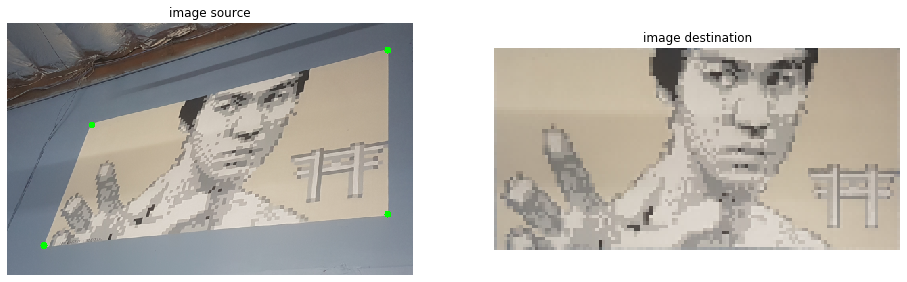

In [6]:
# create the plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('image destination')
axs[1].imshow(img_warp)